# Predictive Analysis and Pre-Processing
**created by mrpintime**









In [1]:
import pandas as pd
import numpy as np
# Preprocessing allows us to standarsize our data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Allows us to split our data into training and testing data and evaluate data on k-fold
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
# evaluate Linear regression model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('preprocessedFeatures.csv')

In [3]:
X_df = df.drop(columns=['G3'])
Y = df['G3']

In [4]:
Y = Y.to_numpy()

In [5]:
X = X_df

In [6]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,grouped_g3
0,0,0,18,0,0,0,4,4,0,0,...,2.000000,3,4,1.000000,1.000000,3,2.000000,0,11,1
1,0,0,17,0,0,1,1,1,0,1,...,2.236068,3,3,1.000000,1.000000,3,1.414214,9,11,1
2,0,0,15,0,1,1,1,1,0,1,...,2.000000,3,2,1.414214,1.732051,3,2.449490,12,13,1
3,0,0,15,0,0,1,4,2,1,2,...,1.732051,2,2,1.000000,1.000000,5,0.000000,14,14,1
4,0,0,16,0,0,1,3,3,2,1,...,2.000000,3,2,1.000000,1.414214,5,0.000000,11,13,1


In [7]:
# standardaize and normalize
X = StandardScaler().fit_transform(X)

# Linear regreassion

### Polynomial Regression

In [8]:
mse_list = []
r2_list = []

In [9]:
mse_poly = []
r2_poly = []
for i in range(2,5):
    print(f'Degree {i}')
    X_poly = PolynomialFeatures(degree=i).fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=4)
    print(f"test set: {x_test.shape}, {y_test.shape}")
    print(f"train set: {x_train.shape}, {y_train.shape}")
    ml_poly = LinearRegression()
    ml_poly.fit(x_train, y_train)
    score = ml_poly.score(x_test, y_test)
    mse = mean_squared_error(y_pred=ml_poly.predict(x_test), y_true=y_test)
    mse_poly.append(mse)
    r2_poly.append(score)
    print(f'Mean Square Error: {mse}, R2_Score: {score}')
    print('-------------------------------')

mse_list.append(mse_poly)
r2_list.append(r2_poly)

Degree 2
test set: (198, 595), (198,)
train set: (792, 595), (792,)
Mean Square Error: 3.182452814597072, R2_Score: 0.6588550925193217
-------------------------------
Degree 3
test set: (198, 7140), (198,)
train set: (792, 7140), (792,)
Mean Square Error: 1.6910485421580321, R2_Score: 0.8187270536066447
-------------------------------
Degree 4
test set: (198, 66045), (198,)
train set: (792, 66045), (792,)
Mean Square Error: 1.8440484227495637, R2_Score: 0.8023261411187839
-------------------------------


In [10]:
# degree 5 will have to much fetures and need more resourse for computing

### Multiple Linear Regression

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
mlr = LinearRegression()
print(f"test set: {x_test.shape}, {y_test.shape}")
print(f"train set: {x_train.shape}, {y_train.shape}")
mlr.fit(x_train, y_train)
score = mlr.score(x_test, y_test)
mse = mean_squared_error(y_pred=mlr.predict(x_test), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

mse_list.append(mse)
r2_list.append(score)

test set: (198, 33), (198,)
train set: (792, 33), (792,)
Mean Square Error: 0.5152130799712819, R2_Score: 0.9447714298564105


## Gride Search

### Ridge and Polynomial Regression

**degree 4 and above need high power chipset to implementing the polynomial and Grid Search**

In [12]:
parameters = {'alpha':[x for x in np.arange(0.1,9, 0.5)], 'solver':['auto']}
mse_ridge_poly = []
r2_ridge_poly = []
for i in range(2,4):
    print(f'Degree {i}')
    X_poly = PolynomialFeatures(degree=i).fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=4)
    print(f"test set: {x_test.shape}, {y_test.shape}")
    print(f"train set: {x_train.shape}, {y_train.shape}")
    ml_ridge = Ridge()
    ridge_grid = GridSearchCV(ml_ridge, parameters, cv=5)
    ridge_grid.fit(x_train, y_train)
    score = ridge_grid.score(x_test, y_test)
    mse = mean_squared_error(y_pred=ridge_grid.predict(x_test), y_true=y_test)
    mse_ridge_poly.append(mse)
    r2_ridge_poly.append(score)
    print(f'Mean Square Error: {mse}, R2_Score: {score}')
    print(f'best parameters: {ridge_grid.best_params_}, and best result: {ridge_grid.best_score_}')
    print('-------------------------------')
    
mse_list.append(mse_ridge_poly)
r2_list.append(r2_ridge_poly)

Degree 2
test set: (198, 595), (198,)
train set: (792, 595), (792,)
Mean Square Error: 1.6438416523044392, R2_Score: 0.8237874240220953
best parameters: {'alpha': 8.6, 'solver': 'auto'}, and best result: 0.7592774392916608
-------------------------------
Degree 3
test set: (198, 7140), (198,)
train set: (792, 7140), (792,)
Mean Square Error: 1.453329567045632, R2_Score: 0.8442094794258594
best parameters: {'alpha': 8.6, 'solver': 'auto'}, and best result: 0.8065948425366318
-------------------------------


### Ridge Regression

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
parameters = {'alpha':[x for x in np.arange(0.1,9, 0.5)], 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
print(f"test set: {x_test.shape}, {y_test.shape}")
print(f"train set: {x_train.shape}, {y_train.shape}")
ml_ridge = Ridge()
ridge_grid = GridSearchCV(ml_ridge, parameters, cv=5)
ridge_grid.fit(x_train, y_train)
score = ridge_grid.score(x_test, y_test)
mse = mean_squared_error(y_pred=ridge_grid.predict(x_test), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')
print(f'best parameters: {ridge_grid.best_params_}, and best result: {ridge_grid.best_score_}')

mse_list.append(mse)
r2_list.append(score)

test set: (198, 33), (198,)
train set: (792, 33), (792,)
Mean Square Error: 0.5173686844296519, R2_Score: 0.9445403585644364
best parameters: {'alpha': 3.6, 'solver': 'sparse_cg'}, and best result: 0.9255307645822249


### Cross-Val and Multiple Regression

In [14]:
ml_for_cross = LinearRegression()
score = cross_val_score(ml_for_cross, X, Y, cv=5)
print(score)
print('Average of scores: %.2f' % score.mean())

[0.88918325 0.89278532 0.93751022 0.93960088 0.93447638]
Average of scores: 0.92


# review models

***you can see cross val result in line above***

In [15]:
models = ['Polynomial Regression', 'Multiple Linear Regression', 'Ridge and Polynomial Regression', 'Ridge Regression']

In [16]:
model_1 = pd.DataFrame({'Degree 2':[mse_list[0][0], r2_list[0][0]], 'Degree 3':[mse_list[0][1], r2_list[0][1]], 
              'Degree 4':[mse_list[0][2], r2_list[0][2]]}, index=['MSE', 'R2'])

In [17]:
model_2 = pd.DataFrame({'result':[mse_list[1], r2_list[1]]}, index=['MSE', 'R2'])

In [18]:
model_3 = pd.DataFrame({'Degree 2':[mse_list[2][0], r2_list[2][0]], 'Degree 3':[mse_list[2][1], r2_list[2][1]]}, index=['MSE', 'R2'])

In [19]:
model_4 = pd.DataFrame({'result':[mse_list[3], r2_list[3]]}, index=['MSE', 'R2'])

Text(0.5, 0.98, 'Results of 4 Models')

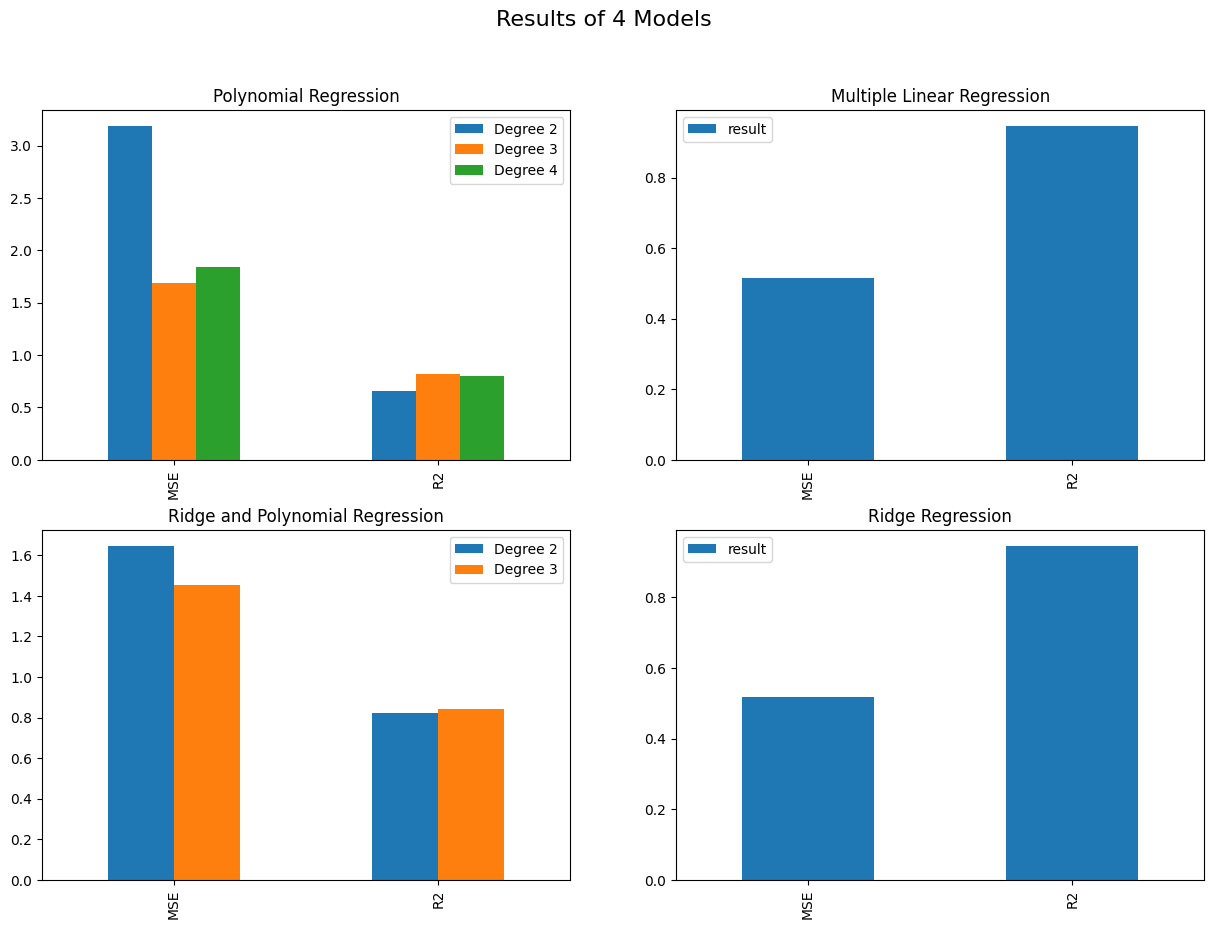

In [20]:
fig = plt.figure(figsize=(15,10))
model_1.plot(kind='bar', title='Polynomial Regression', ax=fig.add_subplot(221))
model_2.plot(kind='bar', title='Multiple Linear Regression', ax=fig.add_subplot(222))
model_3.plot(kind='bar', title='Ridge and Polynomial Regression', ax=fig.add_subplot(223))
model_4.plot(kind='bar', title='Ridge Regression', ax=fig.add_subplot(224))

fig.suptitle('Results of 4 Models', fontsize=16)

# Done

New Aproaches coming soon...😉 